# Assignment 3 for Course 1MS041
Make         sure you pass the `# ... Test` cells and
 submit your solution notebook in the corresponding assignment on the course website. You can submit multiple times before the deadline         and your highest score will be used.

---
## Assignment 3, PROBLEM 1
Maximum Points = 8


Consider the data `X` and `y`, in the cell below. `X` denotes $20$ points in $\mathbb{R}^2$ and `y` corresponds to the labels for these points, i.e. it is a classification problem.

1. [3p] Implement the function `perceptron` by filling in `XXX`.
2. [2p] Use your implemented `perceptron` function to compute a vector (numpy array) $\hat w$ with shape `(3,1)` such that 
$$
    (\hat w \cdot \hat x_i) l_i > 0, \quad \forall i=1,\ldots,20
$$
put your answer in `hat_w` below (the last dimension is the bias dimension, i.e. the added dimension we used to derive the perceptron)

3. [3p] Use the vector $\hat w$ that you just found and compute $r = \max_i |x_i|$ (put your result in `r`), finally use this to give an upper bound to the number of iterations needed for the perceptron algorithm to converge on this dataset, see chapter 8 in the ITDS notes. Put the result in `iteration_bound`.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

X = np.array([[0.14774693918368506,0.8537253157278155],[-0.1755517430286779,0.8979710703337818],[0.5227216475286975,0.7448281947022451],[-0.5071170511153492,0.8002027400836075],[-0.39436968212400453,1.0177689414422981],[-0.3983065780966649,1.0443663197782966],[-0.08652771617599643,0.48036820824519255],[0.15352541170101042,0.6820807981911706],[-0.3303348532791869,1.120673883903539],[-0.2656220857139274,0.8526638282828739],[0.7259603693529442,0.25428467532034965],[0.4577253912481767,-0.2358809079980879],[0.9722462145222105,0.13128550836973255],[0.4089349951770505,-0.09503914544452634],[0.9718156747909192,0.3524307824261209],[1.2009353774940565,-0.25004126389987974],[1.271791635779178,-0.07571928320750206],[0.36784476124502913,-0.23743021661715671],[0.8918396050420891,-0.1029336332277948],[0.4501578013678095,-0.13188266835015783]])+np.array([10,0]).reshape(1,-1)
y = np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0])

data = np.hstack((X, y.reshape(-1, 1)))
df = pd.DataFrame(data, columns=['X1', 'X2', 'Label'])

/Users/sunandclouds/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Part 1

[-1.49468903] [34.08611021] [3.]


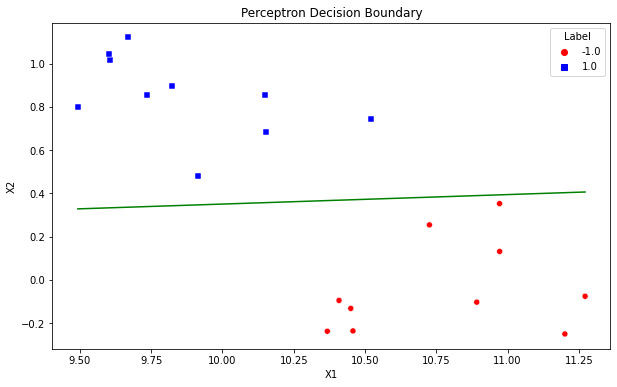

In [2]:
# Part 1
def perceptron(X, y, max_iter=1000):
    n_samples, n_features = X.shape
    X_bias = np.hstack([X, np.ones((n_samples, 1))])  # Adding a bias term
    w = np.zeros(n_features + 1)

    for _ in range(max_iter):
        for i in range(n_samples):
            if (np.dot(X_bias[i], w) * y[i]) <= 0:
                w += y[i] * X_bias[i]
    return w[:,None]

# Extracting the coefficients for plotting
w1, w2, bias = perceptron(X, y)
print(w1, w2, bias)

# Decision boundary for modified weights
x_values = np.linspace(X[:,0].min(), X.max(), 100)
y_values = -(w1 / w2) * x_values - (bias / w2)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='X1', y='X2', hue='Label', palette=['red', 'blue'], style='Label', markers=['o', 's'])
plt.plot(x_values, y_values, color="green")
plt.title('Perceptron Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
# Part 1
hat_w = np.array([[-1.494689027746233, 34.08611020711558, 3.0]]).T

In [4]:
# Part 2

r = 11.272 # np.max(np.linalg.norm(X, axis=-1))

iteration_bound = 149053 # r**2 * np.linalg.norm(hat_w, axis=0)**2

---
## Assignment 3, PROBLEM 2
Maximum Points = 8


For this problem you will need the [pandas](https://pandas.pydata.org/) package and the [sklearn](https://scikit-learn.org/stable/) package. If you download the updated `data` folder from the course website you will find a file called `indoor_train.csv`, this file includes a bunch of positions in (X,Y,Z) and also a location number. The idea is to assign a room number (Location) to the coordinates (X,Y,Z).

1. [2p] Take the data in the file `indoor_train.csv` and load it using pandas into a dataframe `df_train`
2. [3p] From this dataframe `df_train`, create two numpy arrays, one `Xtrain` and `Ytrain`, they should have sizes `(1154,3)` and `(1154,)` respectively. Their `dtype` should be `float64` and `int64` respectively.
3. [3p] Train a Support Vector Classifier, `sklearn.svc.SVC`, on `Xtrain, Ytrain` with `kernel='linear'` and name the trained model `svc_train`.

To mimic how [kaggle](https://www.kaggle.com/) works, the Autograder has access to a hidden test-set and will test your fitted model.

In [5]:
df_train = pd.read_csv("data/indoor_train.csv")

In [6]:
Xtrain = df_train.to_numpy()[:,:-1].astype(np.float64)
Ytrain = df_train.to_numpy()[:,-1].astype(np.int64)

In [7]:
from sklearn.svm import SVC

svc_train = SVC(kernel="linear")
svc_train.fit(Xtrain, Ytrain)

SVC(kernel='linear')

---
## Assignment 3, PROBLEM 3
Maximum Points = 8


## SMS spam filtering [8p]

In the following problem we will explore SMS spam texts. The dataset is the `SMS Spam Collection Dataset` and we have provided for you a way to load the data. If you run the appropriate cell below, the result will be in the `spam_no_spam` variable. The result is a `list` of `tuples` with the first position in the tuple being the SMS text and the second being a flag `0 = not spam` and `1 = spam`.

1. [3p] Let $X$ be the random variable that represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$ 
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. (This is precision). Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

2. [3p] Estimate the probability that the word "free" or "prize" is in the text given that it is spam. (This is recall) I.e. estimate
$$
    \mathbb{P}(\text{"free" or "prize" is in } X \mid Y = 1) \enspace .
$$
3. [2p] Provide a "90\%" interval of confidence around the true probability from **part 1**. I.e. use the Hoeffding inequality to obtain for your estimate $\hat P$. Find $l > 0$ such that the following holds:
$$
    \mathbb{P}(\hat P - l \leq \mathbb{E}[\hat P] \leq \hat P + l) \geq 0.9 \enspace .
$$

In [8]:

# Run this cell to get the SMS text data
def load_sms():
    import csv
    lines = []
    hamspam = {'ham': 0, 'spam': 1}
    with open('data/spam.csv', mode='r',encoding='latin-1') as f:
        reader = csv.reader(f)
        header = next(reader)
        lines = [(line[1],hamspam[line[0]]) for line in reader]
        
    return lines
spam_no_spam = load_sms()

We want to estimate the conditional probability of getting spam, given the words x = "free" or "price", we can do this by using Bayes theorem
$$
    P(y=1|X=x) = P(X=x|y=1)P(y=1) / P(X=x).
$$
We can compute the expression induvidually:
1. $P(X=x|y=1)$ is the probability of observing "free" or "price", given that the message is spam. 
2. $P(y=1)$ is the probability of observing a spam in the dataset, this can be estimated with relative frequency.
3. $P(X=x)$ is the probability of observing "free" or "price" in the dataset. This can be computed with the law of total probability, $$
    P(X=x) = P(X=x|y=1)P(y=1) + P(X=x|y=0)P(y=0).
$$
4. To compute 3., we need to know $P(X=x|y=0)$ and $P(y=0)$. The first expression is the probability of observing "free" or "price", given not spam. We can compute this with the same function used in 1. The second expression is the probability of observing no spam in the dataset, which can be estimated with relative frequency.

In conclusion, write a function 'words_given_class' that computes $P(X=x|y=1)$.\
Compute $P(y=1)$ with 'counts of y=1' / 'size of dataset'.\
Compute $P(X=x|y=0)$ using 'words_given_class' with $y=0$.\
Compute $P(y=0)$ with 'counts of y=0' / 'size of dataset'.\
Plug in the expressions into Bayes theorem.

In [9]:
def estimate_probabilities(spam_no_spam):
    total_sms = len(spam_no_spam)
    spam_count = sum(1 for _, flag in spam_no_spam if flag == 1)
    spam_with_keywords_count = sum(1 for text, flag in spam_no_spam if flag == 1 and ("free" in text.lower() or "prize" in text.lower()))
    keyword_in_sms_count = sum(1 for text, _ in spam_no_spam if "free" in text.lower() or "prize" in text.lower())

    p_spam = spam_count / total_sms
    p_keyword_given_spam = spam_with_keywords_count / spam_count if spam_count > 0 else 0
    p_spam_given_keyword = spam_with_keywords_count / keyword_in_sms_count if keyword_in_sms_count > 0 else 0

    return p_spam, p_keyword_given_spam, p_spam_given_keyword

p_spam, p_keyword_given_spam, p_spam_given_keyword = estimate_probabilities(spam_no_spam)

# For the confidence interval using Hoeffding's inequality
def hoeffding_interval(p_hat, n, confidence=0.9):
    z = np.sqrt((1/(2*n)) * np.log(2/confidence))
    print(z)
    return np.array([p_hat - z, p_hat + z])

interval = hoeffding_interval(p_spam_given_keyword, len(spam_no_spam))

# Output the results
print("Probability of spam given keyword:", p_spam_given_keyword)
print("Probability of keyword given spam:", p_keyword_given_spam)
print("90% Confidence interval:", interval)

0.008464844830798221
Probability of spam given keyword: 0.808695652173913
Probability of keyword given spam: 0.37349397590361444
90% Confidence interval: [0.80023081 0.8171605 ]


In [10]:
problem4_hatP = 0.808695652173913

In [11]:
# fill in the estimate for part 2 here (should be a number between 0 and 1)
problem4_hatP2 = 0.37349397590361444

In [12]:
# fill in the calculated l from part 3 here
problem4_l = np.array([0.80023081, 0.8171605])